In [1032]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import os, glob
import operator as op

In [1033]:
class Pomiary:
    def __init__(self,adres):
        self.files = [pd.read_csv(file, header=1, encoding='latin-1', engine='python') for file in glob.glob(os.path.join(adres ,"*.txt"))] 
        for i in range(len(self.files)):
            self.files[i]=np.array(self.files[i][self.files[i].columns].values.tolist()).T
            self.files[i][1]=self.files[i][1]*10**6
        df=[pd.read_csv(file, header=0, encoding='latin-1', engine='python') for file in glob.glob(os.path.join(adres ,"*.txt"))] 
        self.label=[]
        for i in range(len(df)):
            self.label.append(i)
            for col in df[i].columns:
                self.label[i]=col
    def wykresy(self,typ='plot'):
            for i in range(len(self.files)):
                plt.plot(self.files[i][0],self.files[i][1],label=self.label[i])
                plt.xlabel('E [V]')
                plt.ylabel('I [$\mu$A]')
                plt.style.use('seaborn-whitegrid')
                plt.legend()
                if typ== 'plot':
                    plt.gca().invert_xaxis()
            plt.show()
    def pik(self,typ='norm'):
        piki=[]
        E0prime=[]
        for i in range(len(self.files)):
            piki.append(i)
            E0prime.append(i)
            ipa=self.files[i][1].max()
            ipc=self.files[i][1].max()
            Epc=self.files[i][0][list(self.files[i][1]).index(ipc)]
            Epa=self.files[i][0][list(self.files[i][1]).index(ipa)]
            piki[i]=[[Epc,ipc],[Epa,ipa]]
            E0prime[i]=(Epc+Epa)/2
        self.ipci=[piki[i][0][1] for i in range(len(piki))]
        self.ipai=[piki[i][1][1] for i in range(len(piki))]
        return piki, E0prime
    def wykresiodv(self):
        pik=self.pik()[0]
        v=[]
        for i in range(len(self.label)):
            v.append(i)
            k=[int(s) for s in self.label[i].split() if s.isdigit()]
            v[i]=k[0]
        self.v=np.array(v)/1000
        plt.scatter(self.v[i]**(1/2),pik[i][0][1],label='i$_pc$')
        plt.scatter(self.v[i]**(1/2),pik[i][1][1],label='i$_pa$')

In [1034]:
AuCV=Pomiary('F:\Github Rep\Analiza instrumentalna\cwicz 4\A5\CV\Au')
GCECV=Pomiary('F:\Github Rep\Analiza instrumentalna\cwicz 4\A5\CV\GCE')
kal50CV=Pomiary('F:\Github Rep\Analiza instrumentalna\cwicz 4\A5\CV\kal 50mV')
kal250CV=Pomiary('F:\Github Rep\Analiza instrumentalna\cwicz 4\A5\CV\kal 250mV')
tlenCV=Pomiary('F:\Github Rep\Analiza instrumentalna\cwicz 4\A5\CV\pomiar tlen')

In [1035]:
kal50CV.label

['10 mM/l', '4 mM/l', '6 mM/l', '8 mM/l', 'Próbka']

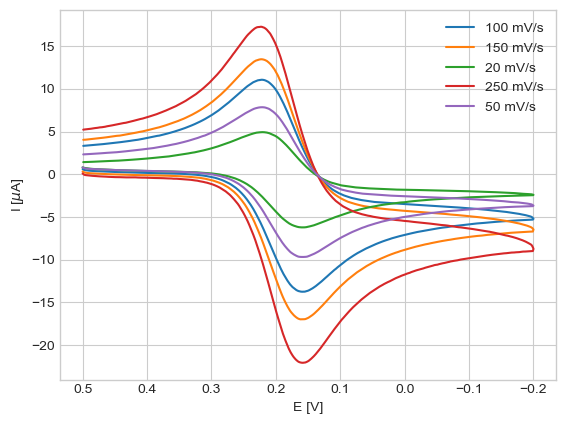

In [1036]:
AuCV.wykresy()

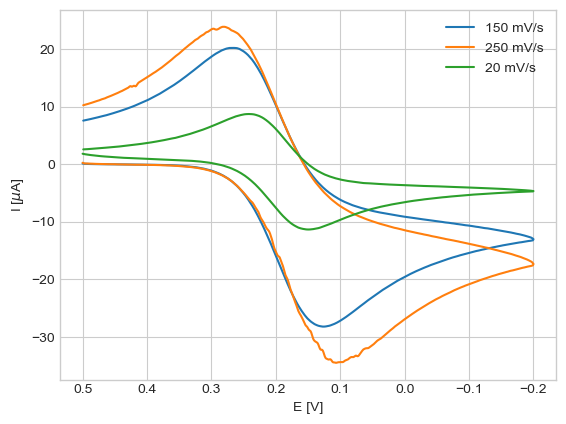

In [1037]:
GCECV.wykresy()

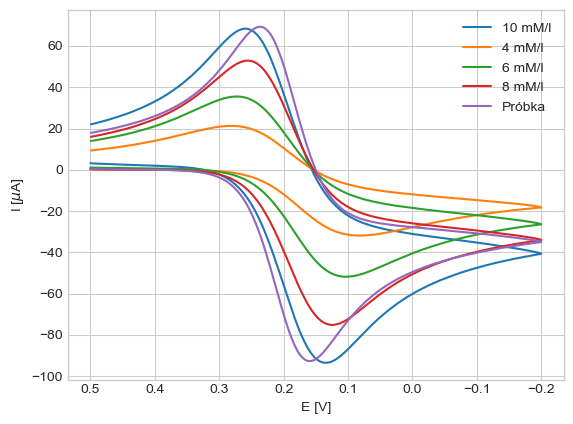

In [1038]:
kal50CV.wykresy()

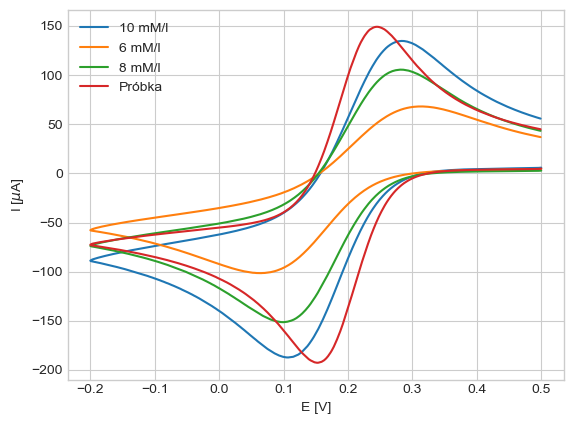

In [1047]:
kal250CV.wykresy()

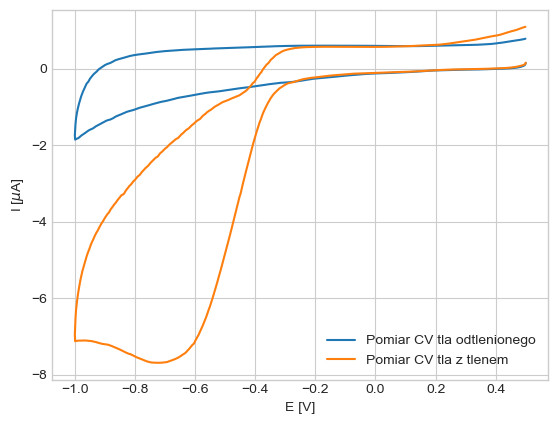

-0.719

In [1048]:
tlenCV.wykresy(typ='chuj')
k=list(tlenCV.files[1][1]).index(tlenCV.files[1][1].min())
tlenCV.files[1][0][k]

In [1049]:
kal50CV.pik()

([[[0.259, 68.39999999999999], [0.259, 68.39999999999999]],
  [[0.281, 21.28], [0.281, 21.28]],
  [[0.272, 35.51], [0.272, 35.51]],
  [[0.256, 52.9], [0.256, 52.9]],
  [[0.236, 69.3], [0.236, 69.3]]],
 [0.259, 0.281, 0.272, 0.256, 0.236])